In [1]:
#Setup

#"Standard" Libraries
import uproot, pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
plt.style.use('standard.mplstyle')
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
#Custom libraries
import sys                   #Set up to import custom libraries
sys.path.append('./python')  #From `python` directory
from hist import histogramable as h #Custom library for applying yield models and formatting to use histogram function

dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#We will use the library, just want to adjust how slightly

#Select a file.
cas1 = uproot.open('../test_s15_nopeak.root')['cascade'].arrays(library="pd") #only one top-level key so skip it
cas2 = uproot.open('../test_s05_nopeak.root')['cascade'].arrays(library="pd") #only one top-level key so skip it

#Create histograms to plot
h1 = h(cas1,model=None,method='pandas',resolution=None,flat=True)
h2 = h(cas2,model=None,method='pandas',resolution=None,flat=True)

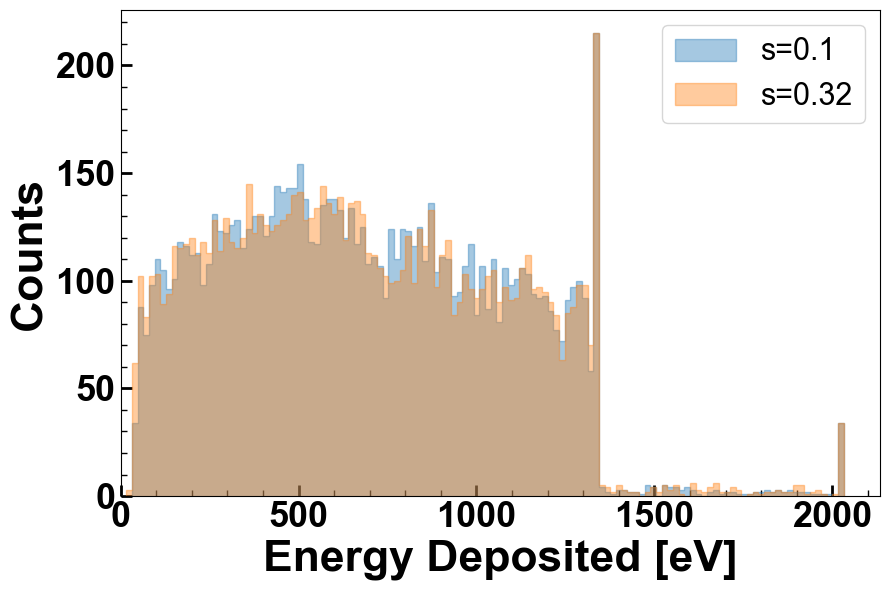

In [3]:
fig = plt.figure(figsize=(9,6))

binsize = 16
bins = np.arange(0,max(np.append(h1,h2))+binsize,binsize)

hist1 = plt.hist(h1,label='s=0.1',bins=bins,alpha=0.4,linewidth=1,histtype='step',fill=True)
hist2 = plt.hist(h2,label='s=0.32',bins=bins,alpha=0.4,linewidth=1,histtype='step',fill=True)
plt.xlim(0)

plt.xlabel('Energy Deposited [eV]',fontweight='bold'); plt.ylabel('Counts',fontweight='bold')
plt.xticks(fontsize=26,fontweight='bold'); plt.yticks(fontsize=26,fontweight='bold')

plt.tight_layout()
plt.savefig('Residuals.pdf')
plt.legend()
plt.show()

In [4]:
div = abs(np.divide(hist1[0] - hist2[0],hist1[0]))
i = 0; todelete = []
j = int(np.where(hist1[0] == max(hist1[0]))[0])
while i<len(div):
    if abs(div[i]) == np.inf:
        div[i] = (hist1[0][i] - hist2[0][i])/hist2[0][i]
        if abs(div[i]) == np.inf:
            raise RecursionError("Both were inf? what",i,hist1[0][i],hist2[0][i])
    elif np.isnan(div[i]):
        todelete+=[i]
        if not np.isnan(div[i]):
            raise ValueError("preparing to delete a non-nan",div[i],"at index",i)
    i += 1
peakdiff = div[j]
#todelete += [j]
div = np.delete(div,todelete)
print(np.mean(div),peakdiff)

0.22328106772233008 0.0


C:\Users\stard\AppData\Local\Temp\ipykernel_16948\3277497335.py:1: RuntimeWarning: divide by zero encountered in divide
  div = abs(np.divide(hist1[0] - hist2[0],hist1[0]))
C:\Users\stard\AppData\Local\Temp\ipykernel_16948\3277497335.py:1: RuntimeWarning: invalid value encountered in divide
  div = abs(np.divide(hist1[0] - hist2[0],hist1[0]))
